<a href="https://colab.research.google.com/github/im-Lily/jupyter/blob/main/cross_validation_ml%5B02%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 교차검증을 간단하게 하는 방법
 -  프로세스(폴드 설정 -> 루프반복을 통해 학습 및 테스트의 인덱스 추출 -> 학습과 예측
 - cross_val_score(예측모델, 피처세트, 레이블, 성능평가지표, 폴드 수) : sklearn에서 제공하는 api

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [76]:
iris_data = load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [77]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [78]:
data = iris_data.data
label = iris_data.target

In [79]:
# 의사결정트리나무
dt_clf = DecisionTreeClassifier(random_state=100)

# 성능평가지표 : acc, 교차검증 : 5개
scores = cross_val_score(dt_clf, data, label, cv = 5, scoring='accuracy')
# 각 폴드 셋의 성능평가지표값 배열로 출력
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [80]:
import numpy as np
print('평균 검증정확도 : ', np.mean(scores))

평균 검증정확도 :  0.9533333333333334


In [81]:
scores = cross_validate(dt_clf, data, label, cv=5, scoring='accuracy')
# dict return
scores

{'fit_time': array([0.00175881, 0.00085115, 0.00076318, 0.00075769, 0.0007174 ]),
 'score_time': array([0.00038075, 0.00033164, 0.0002985 , 0.00044727, 0.00027466]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

In [82]:
scores['test_score']

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

### 교차검증과 하이퍼파라미터를 한번에 할 수 있는 GridSearchCV(하이퍼파라미터 튜닝가능)

- pip install graphviz
- 엔트로피에 대한 이해

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# 샘플 데이터 생성
grp01 = np.array([0.3,0.4,0.3])
grp02 = np.array([0.7,0.2,0.1])
grp03 = np.array([0.01,0.01,0.98])

In [85]:
from IPython.display import Image
Image('C:/Users/jeong/Desktop/AI/jupyter/entropy.png',width=700)

In [86]:
# 만약 3개 yes, 2개 no
# 엔트로피(최대 1)
# 엔트로피가 크다는 것은 분포가 고르다는 것을 의미함 만약 3개 yes, 2개 no
# H = -(2/5)log(2/5) -(3/5)log(3/5) = 0.971

In [87]:
def entropy(x) :
    return (-x*np.log2(x)).sum()

In [88]:
e01 = entropy(grp01)
e02 = entropy(grp02)
e03 = entropy(grp03)

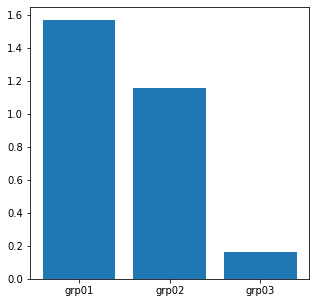

In [89]:
plt.figure(figsize = (5,5))
plt.bar(['grp01','grp02','grp03'],[e01,e02,e03])
plt.show()
plt.close()

In [90]:
import graphviz

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### DecisionTreeClassifier의 하이퍼파라미터
- min_samples_split : 노드를 분리하기 위한 최소한의 샘플 수(과적합 제어 시 사용)
- min_samples_leaf : 리프노드가 되기위한 최소한의 샘플 수(과적합 제어 시 사용)
- max_features
- max_depth : 트리의 최대 깊이
- max_leaf_nodes : 리프노드의 최대 개수

In [92]:
dt_clf = DecisionTreeClassifier(random_state=100, criterion='entropy',max_depth=3)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,random_state=100)

# 학습(fit)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [93]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file = 'iris_tree.dot',
                class_names = iris_data.target_names,
                feature_names = iris_data.feature_names,
                impurity = True,
                filled = True)

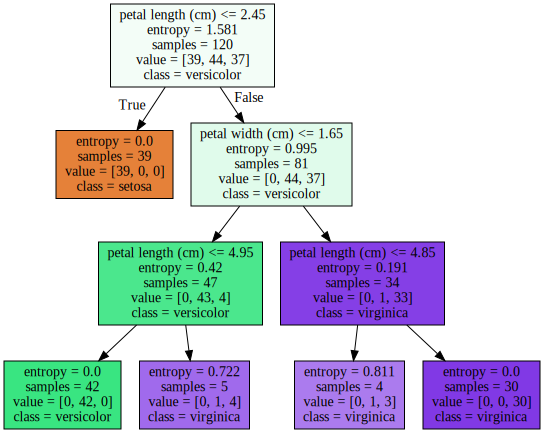

In [94]:
# jupyter 에서 오류 발생 시 해결
# import os
# os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

with open('iris_tree.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

### GridSearhCv

In [95]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

- estimator : 분류기(알고리즘)
- param_grid : {param : value, param : value}
- scoring : 평가방법 지정
- refit : True(최적의 하이퍼 파라미터를 찾는 재학습)

In [96]:
# grid_parameter = {'max_depth' : [1,2,3],
                #   'min_samples_splilt' : [2,3]}

# 저장 후 확인해볼 것
# pd.read_csv('Grid.csv',index_col='순번')

In [105]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,random_state=100)

dt_clf = DecisionTreeClassifier(random_state=100)

grid_parameter = {'max_depth' : [1,2,3],
                  'min_samples_split' : [2,3]}

In [106]:
# GridSearchCV : 하이퍼 파라미터에 대한 튜닝가능
# 모델에 튜닝 후 새로운 모델 생성
dt_searchCV = GridSearchCV(dt_clf, param_grid = grid_parameter, cv = 3, refit = True)

# 학습
dt_searchCV.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},


In [107]:
dt_searchCV.cv_results_

{'mean_fit_time': array([0.00130415, 0.00080689, 0.00066892, 0.00061814, 0.00068227,
        0.0006415 ]),
 'mean_score_time': array([0.00046484, 0.00031559, 0.00026584, 0.00026917, 0.00026337,
        0.00029874]),
 'mean_test_score': array([0.69166667, 0.69166667, 0.95      , 0.95      , 0.975     ,
        0.975     ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_samples_split': 2},
  {'max_depth': 3, 'min_samples_split': 3}],
 'rank_test_score': array([5, 5, 3, 3, 1, 1], 

In [108]:
scoreDF = pd.DataFrame(dt_searchCV.cv_results_)
scoreDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001304,0.000150,0.000465,0.000080,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.70,0.700,0.675,0.691667,0.011785,5
1,0.000807,0.000187,0.000316,0.000074,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.70,0.700,0.675,0.691667,0.011785,5
2,0.000669,0.000003,0.000266,0.000024,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.95,0.900,1.000,0.950000,0.040825,3
3,0.000618,0.000025,0.000269,0.000028,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.95,0.900,1.000,0.950000,0.040825,3
4,0.000682,0.000082,0.000263,0.000012,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.95,0.975,1.000,0.975000,0.020412,1
5,0.000642,0.000013,0.000299,0.000043,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.95,0.975,1.000,0.975000,0.020412,1


In [109]:
scoreDF[['params','rank_test_score']]

,params,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",5
1,"{'max_depth': 1, 'min_samples_split': 3}",5
2,"{'max_depth': 2, 'min_samples_split': 2}",3
3,"{'max_depth': 2, 'min_samples_split': 3}",3
4,"{'max_depth': 3, 'min_samples_split': 2}",1
5,"{'max_depth': 3, 'min_samples_split': 3}",1


In [110]:
print('최적의 파라미터 : ', dt_searchCV.best_params_)
print('최적의 정확도 : ', dt_searchCV.best_score_)
print('최적의 Estimator : ', dt_searchCV.best_estimator_)

최적의 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
최적의 정확도 :  0.975
최적의 Estimator :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')


In [111]:
model = dt_searchCV.best_estimator_
pred = model.predict(X_test)
print('모델 정확도 : ', accuracy_score(y_test, pred))

모델 정확도 :  0.9666666666666667
